In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd

In [15]:
path='../Dataset'
for files in os.listdir(path):
    full_path=os.path.join(path,files)
    print(full_path)
    df=pd.read_csv(full_path)
    print(f'Head of {files} is:\n{df.head()}')

../Dataset\beach.csv
Head of beach.csv is:
  idbeach;"name";"city";"state";"country";"latitude";"longitude"
0  368;"Barra da Lagoa";"Florianopolis";"Santa Ca...            
1  369;"Joaquina";"Florianopolis";"Santa Catarina...            
2  370;"Mole";"Florianopolis";"Santa Catarina";"B...            
3  371;"Ingleses";"Florianopolis";"Santa Catarina...            
4  372;"Brava";"Florianopolis";"Santa Catarina";"...            
../Dataset\day_forecast.csv
Head of day_forecast.csv is:
  iddayforecast;"date";"sunrise";"sunset";"moonset";"moonrise";"moon_phase";"moon_illumination";"maxtemp";"mintemp";"idbeach"
0  334;"2020-02-25";"06:04 AM";"06:50 PM";"07:36 ...                                                                         
1  459;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
2  460;"2020-03-06";"06:10 AM";"06:40 PM";"04:37 ...                                                                         
3  461

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

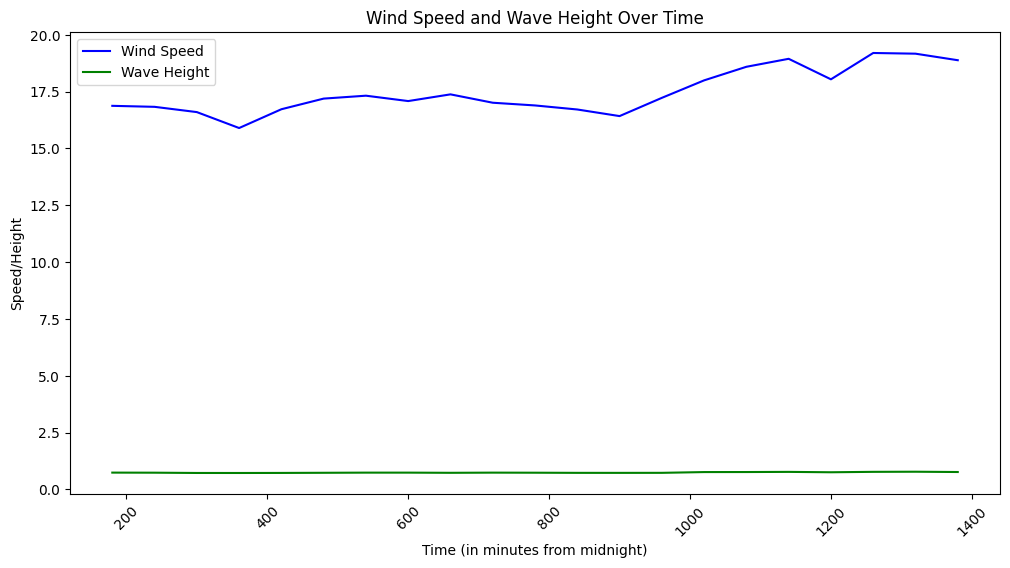

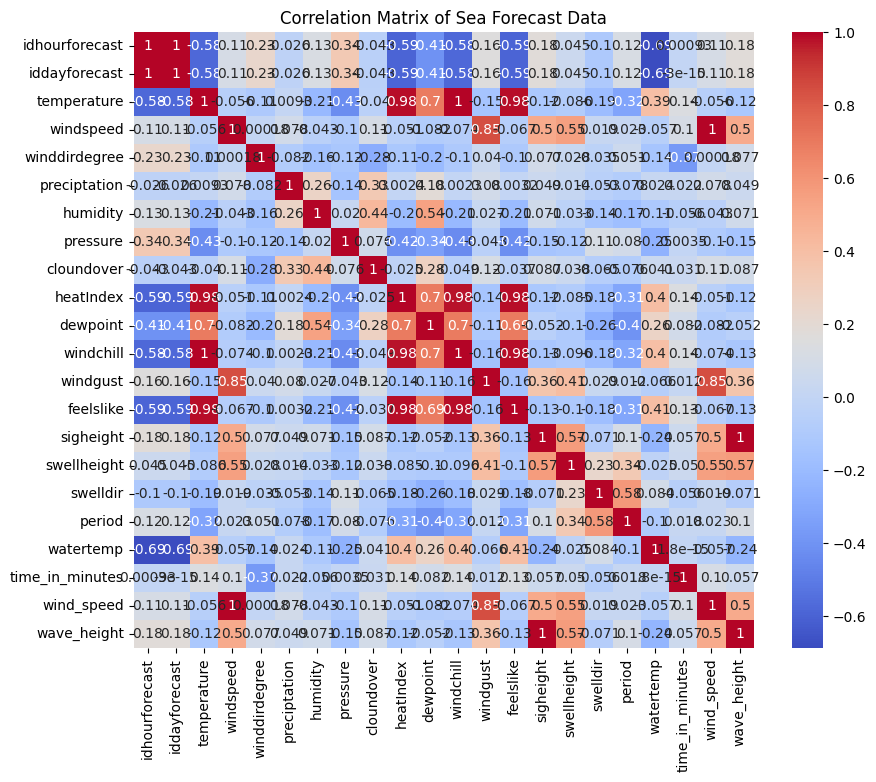

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')

# Convert the 'time' column to proper datetime and extract the time part in minutes
hour_forecast_data['time_in_minutes'] = pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.hour * 60 + pd.to_datetime(hour_forecast_data['time'], format='%H%M', errors='coerce').dt.minute

# Remove the original 'time' column since we can't use it for correlation
hour_forecast_data = hour_forecast_data.drop(columns=['time'])

# Rename columns for clarity
hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

# Group by time_in_minutes to check average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time_in_minutes').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

# Plot the wind speed and wave height over time (in minutes from midnight)
plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time_in_minutes'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time (in minutes from midnight)')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Correlation analysis between different metrics (excluding time column)
plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()


Beach Data:
   idbeach            name           city           state country   latitude  \
0      368  Barra da Lagoa  Florianopolis  Santa Catarina  Brasil -27.572289   
1      369        Joaquina  Florianopolis  Santa Catarina  Brasil -27.629725   
2      370            Mole  Florianopolis  Santa Catarina  Brasil -27.602851   
3      371        Ingleses  Florianopolis  Santa Catarina  Brasil -27.423397   
4      372           Brava  Florianopolis  Santa Catarina  Brasil -27.399194   

   longitude  
0 -48.428124  
1 -48.450798  
2 -48.435063  
3 -48.401169  
4 -48.413608  

Day Forecast Data:
   iddayforecast       date  sunrise   sunset  moonset moonrise  \
0            334  2/25/2020  6:04 AM  6:50 PM  7:36 AM  8:16 PM   
1            459   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
2            460   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
3            461   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 AM   
4            462   3/6/2020  6:10 AM  6:40 PM  4:37 PM  2:27 A

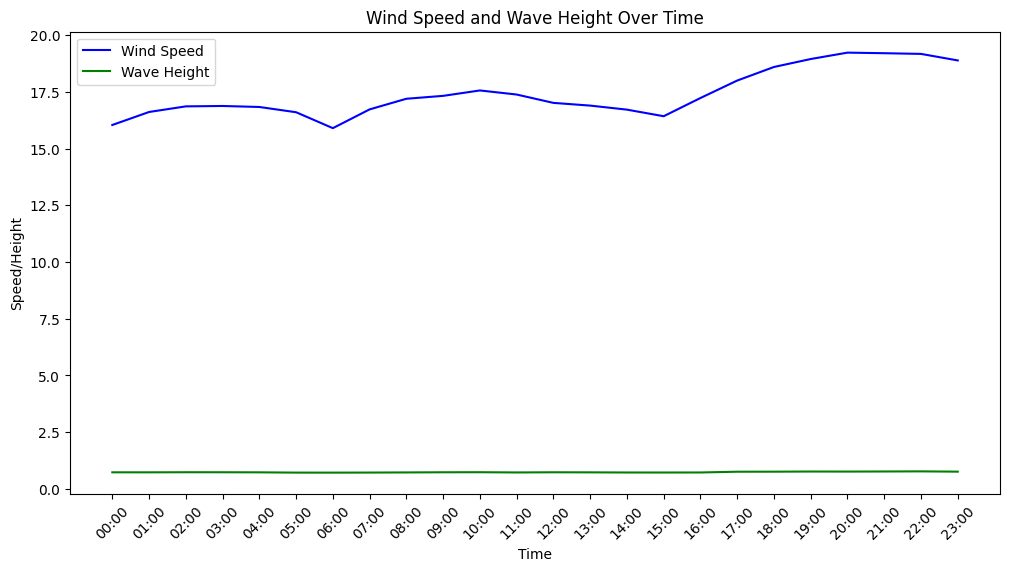

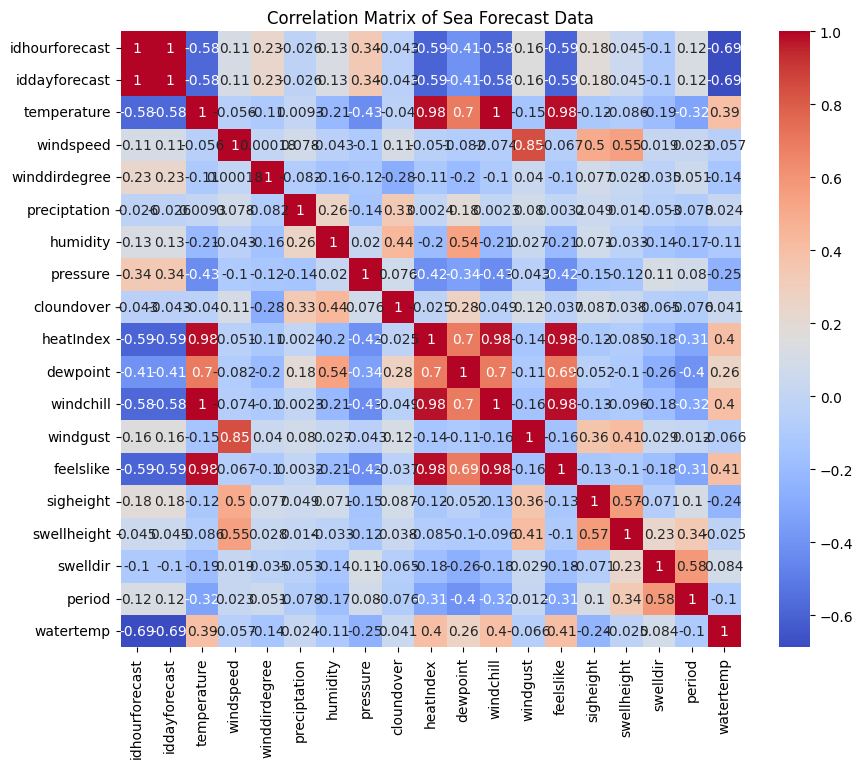

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beach_data = pd.read_csv('../Dataset/beach.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')
hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')
sea_condition_fact_data = pd.read_csv('../Dataset/sea_condition_fact.csv')
spot_data = pd.read_csv('../Dataset/spot.csv')
tide_data = pd.read_csv('../Dataset/tide.csv')

print("Beach Data:")
print(beach_data.head())

print("\nDay Forecast Data:")
print(day_forecast_data.head())

print("\nHour Forecast Data:")
print(hour_forecast_data.head())

print("\nMissing values in Hour Forecast Data:")
print(hour_forecast_data.isnull().sum())



hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

print("\nHour Forecast Data after formatting time:")
print(hour_forecast_data[['time', 'temperature', 'windspeed', 'winddirdegree']].head())

hour_forecast_data['wind_speed'] = hour_forecast_data['windspeed']
hour_forecast_data['wave_height'] = hour_forecast_data['sigheight']

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'wind_speed': 'mean',
    'wave_height': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(grouped_hour_data['time'], grouped_hour_data['wind_speed'], label='Wind Speed', color='blue')
plt.plot(grouped_hour_data['time'], grouped_hour_data['wave_height'], label='Wave Height', color='green')
plt.xlabel('Time')
plt.ylabel('Speed/Height')
plt.title('Wind Speed and Wave Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(hour_forecast_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Forecast Data')
plt.show()

In [72]:
import pandas as pd
import numpy as np
import lightningchart as lc

# Set the license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)

hour_forecast_data['time'] = hour_forecast_data['time'].apply(lambda x: f"{int(x // 100):02}:{int(x % 100):02}")

grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()


chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Number of Earthquakes Over Time'
)

line_series = chart.add_line_series()
line_series.set_name('Wind Speed')
line_series.set_line_color(lc.Color(0, 0, 255))
line_series.set_line_thickness(2)

line_series = chart.add_line_series()
line_series.set_name('Wave Height')
line_series.set_line_color(lc.Color(0, 255, 0))
line_series.set_line_thickness(2)

line_series.append_samples(    
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

line_series.append_samples(
    x_values = grouped_hour_data['time'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_interval(0, 24)
x_axis.set_tick_strategy('Time')

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

chart.open()

127.0.0.1 - - [15/Sep/2024 10:27:16] "GET / HTTP/1.1" 200 -


In [88]:
import pandas as pd
import lightningchart as lc

# Set up your LightningChart license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'
hour_forecast_data = pd.read_csv(file_path)


# Group by time to calculate the average wind speed and wave height
grouped_hour_data = hour_forecast_data.groupby('time').agg({
    'windspeed': 'mean',
    'sigheight': 'mean'
}).reset_index()

grouped_hour_data['time_in_milliseconds'] = grouped_hour_data['time']/100*3600*1000

# Initialize the LightningChart for line chart visualization
chart = lc.ChartXY(
    theme=lc.Themes.White,
    title='Wind Speed and Wave Height Over Time'
)

# Add wind speed line series
wind_speed_series = chart.add_line_series()
wind_speed_series.set_name('Wind Speed')
wind_speed_series.set_line_color(lc.Color(0, 0, 255))  # Blue color
wind_speed_series.set_line_thickness(2)

# Add wave height line series
wave_height_series = chart.add_line_series()
wave_height_series.set_name('Wave Height')
wave_height_series.set_line_color(lc.Color(0, 255, 0))  # Green color
wave_height_series.set_line_thickness(2)

# Add data to both series
wind_speed_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['windspeed'].tolist()
)

wave_height_series.append_samples(
    x_values=grouped_hour_data['time_in_milliseconds'].tolist(),
    y_values=grouped_hour_data['sigheight'].tolist()
)

# Customize X-axis with Time TickStrategy
x_axis = chart.get_default_x_axis()
x_axis.set_title('Time')
x_axis.set_tick_strategy(strategy="Time")  # Using Time strategy, assuming time starts at 00:00

y_axis = chart.get_default_y_axis()
y_axis.set_title('Speed/Height')

# Open the chart
chart.open()


127.0.0.1 - - [15/Sep/2024 11:04:57] "GET / HTTP/1.1" 200 -


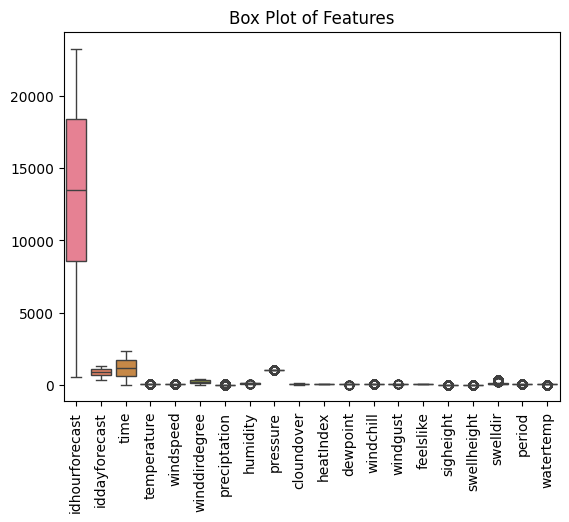

In [3]:
import pandas as pd
import numpy as np
import lightningchart as lc
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt

hour_forecast_data = pd.read_csv('../Dataset/hour_forecast.csv')
day_forecast_data = pd.read_csv('../Dataset/day_forecast.csv')

merged_data = pd.merge(hour_forecast_data, day_forecast_data[['iddayforecast', 'idbeach']], on='iddayforecast')


sns.boxplot(data=hour_forecast_data)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()


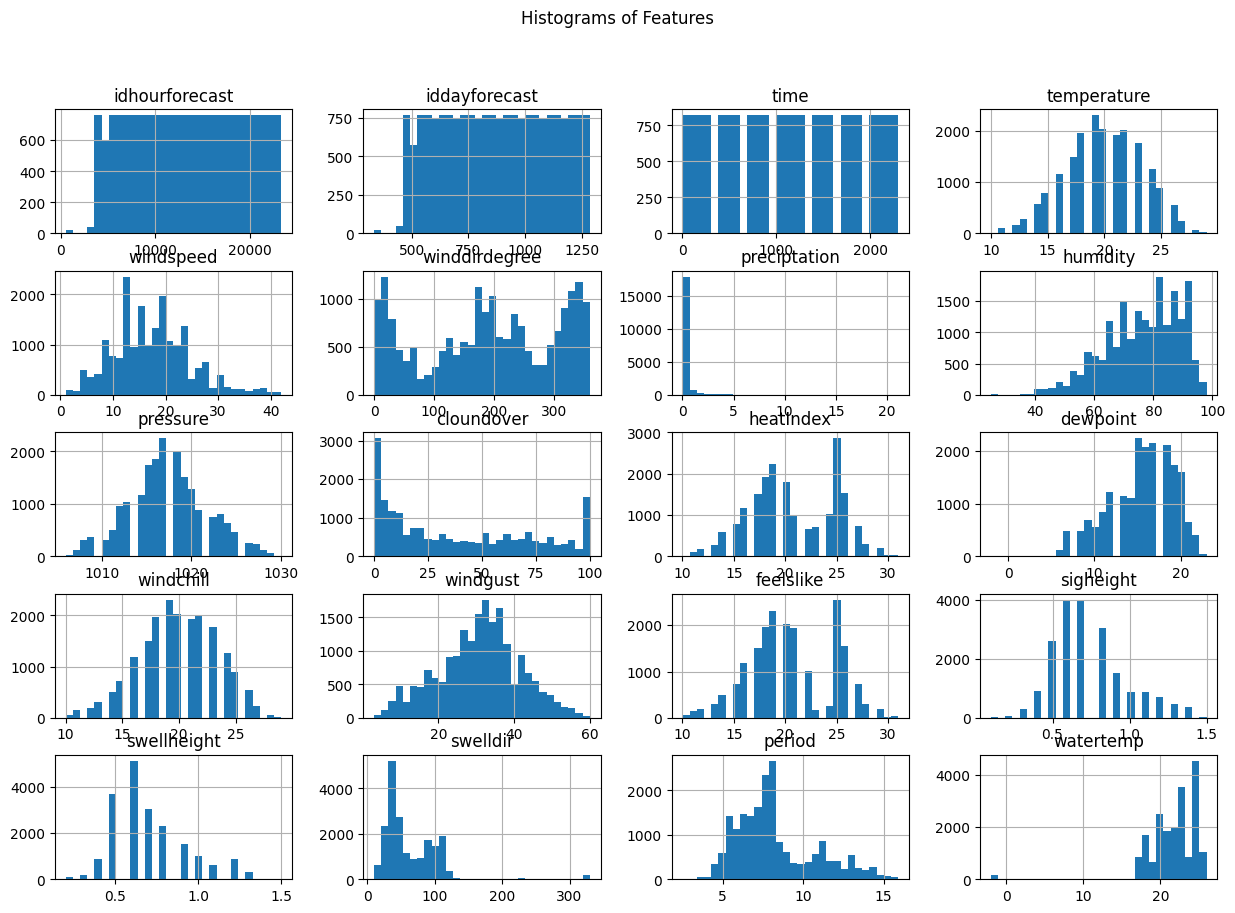

In [5]:
hour_forecast_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()


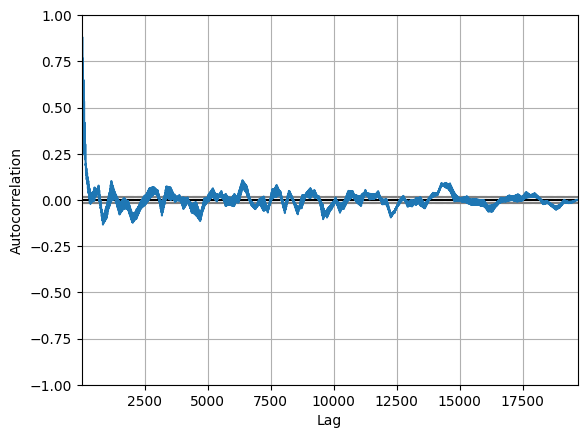

In [12]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(hour_forecast_data['windspeed'])
plt.show()


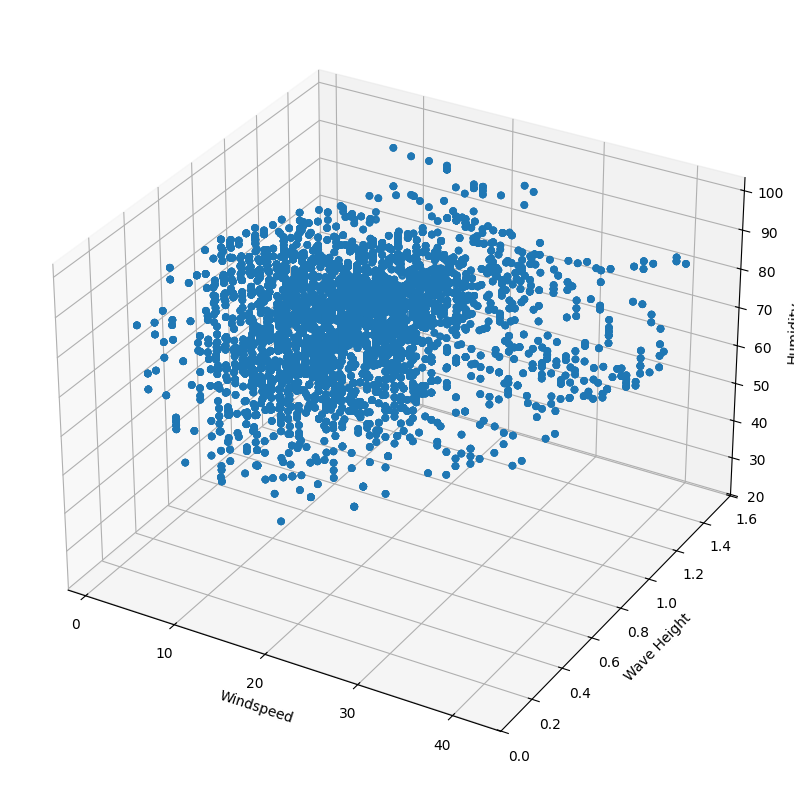

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hour_forecast_data['windspeed'], hour_forecast_data['sigheight'], hour_forecast_data['humidity'])
ax.set_xlabel('Windspeed')
ax.set_ylabel('Wave Height')
ax.set_zlabel('Humidity')
fig.set_size_inches(10, 10)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '../Dataset/hour_forecast.csv'  # replace with your actual file path
data = pd.read_csv(file_path)

# Preview the data
print(data.head())

# Select the features and the target
features = ['idhourforecast', 'iddayforecast', 'time', 'temperature', 'windspeed', 
            'winddirdegree', 'preciptation', 'humidity', 'pressure', 'cloundover', 
            'heatIndex', 'dewpoint', 'windchill', 'windgust', 'feelslike', 'swellheight', 
            'swelldir', 'period', 'watertemp']

# Bin 'sigheight' into categories
# You can adjust the number of bins and their ranges depending on the distribution of your data
bins = [0, 0.5, 1.0, 1.5]  # You can modify the bin boundaries
labels = ['Low', 'Moderate', 'High']  # Label the categories

# Create the binned target variable
data['sigheight_category'] = pd.cut(data['sigheight'], bins=bins, labels=labels, include_lowest=True)

# Select the features and the new binned target
X = data[features]
y = data['sigheight_category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gaussian Naive Bayes model on the binned data
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_scaled)

# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")


   idhourforecast  iddayforecast  time  temperature  windspeed  winddirdegree  \
0             494            334     0           23         26             10   
1             495            334   100           23         27            126   
2             496            334   200           23         27            242   
3             497            334   300           23         27            357   
4             498            334   400           23         26            354   

   preciptation  humidity  pressure  cloundover  heatIndex  dewpoint  \
0           0.8        89      1013         100         25        21   
1           1.0        90      1013         100         25        21   
2           1.3        91      1012         100         25        21   
3           1.5        91      1011         100         25        21   
4           1.0        90      1011          92         25        21   

   windchill  windgust  feelslike  sigheight  swellheight  swelldir  period  \
0

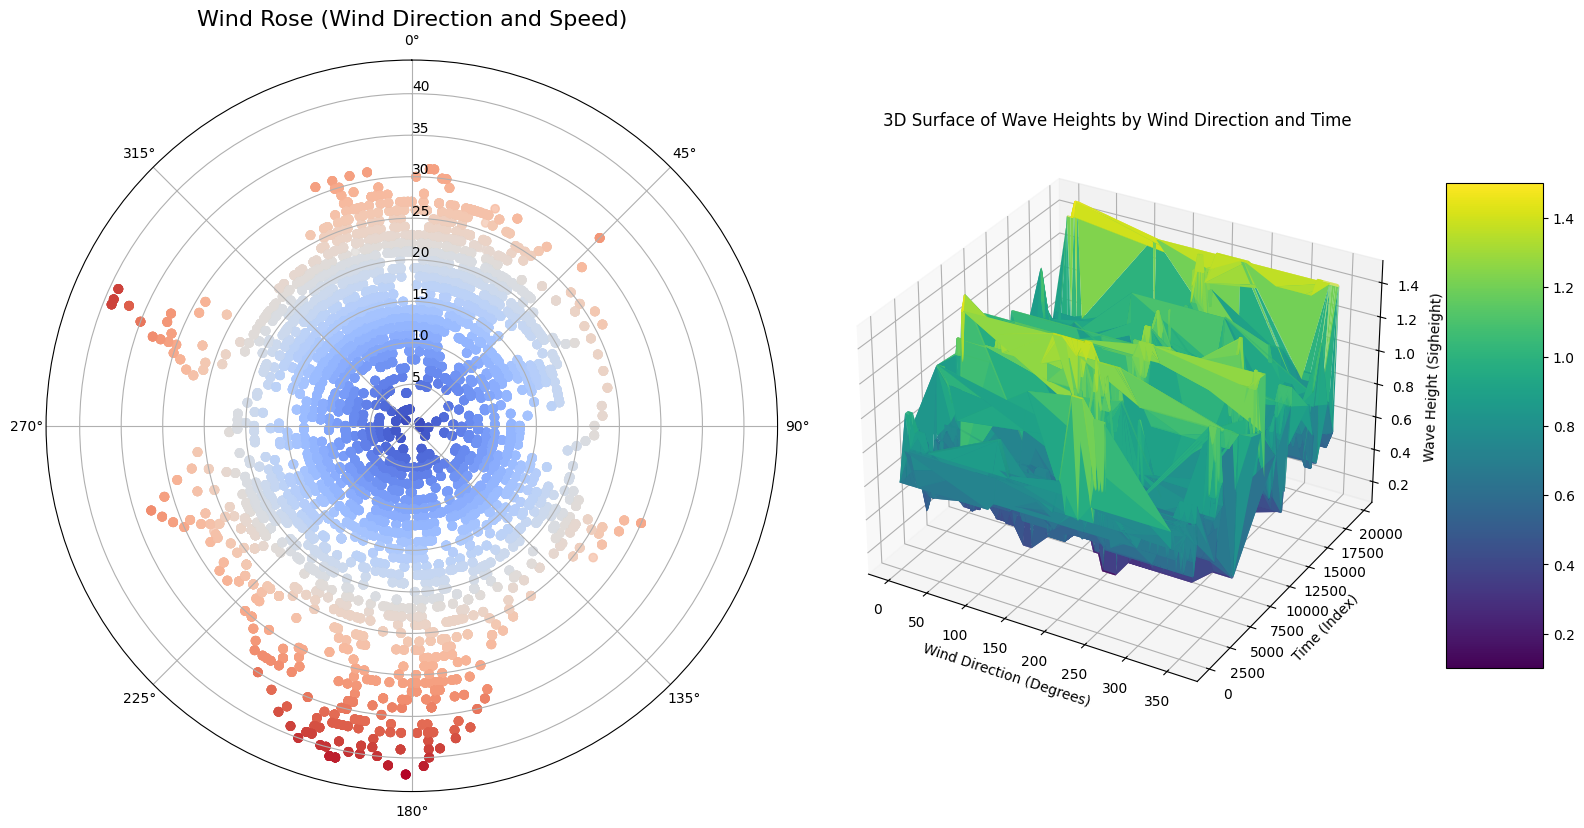

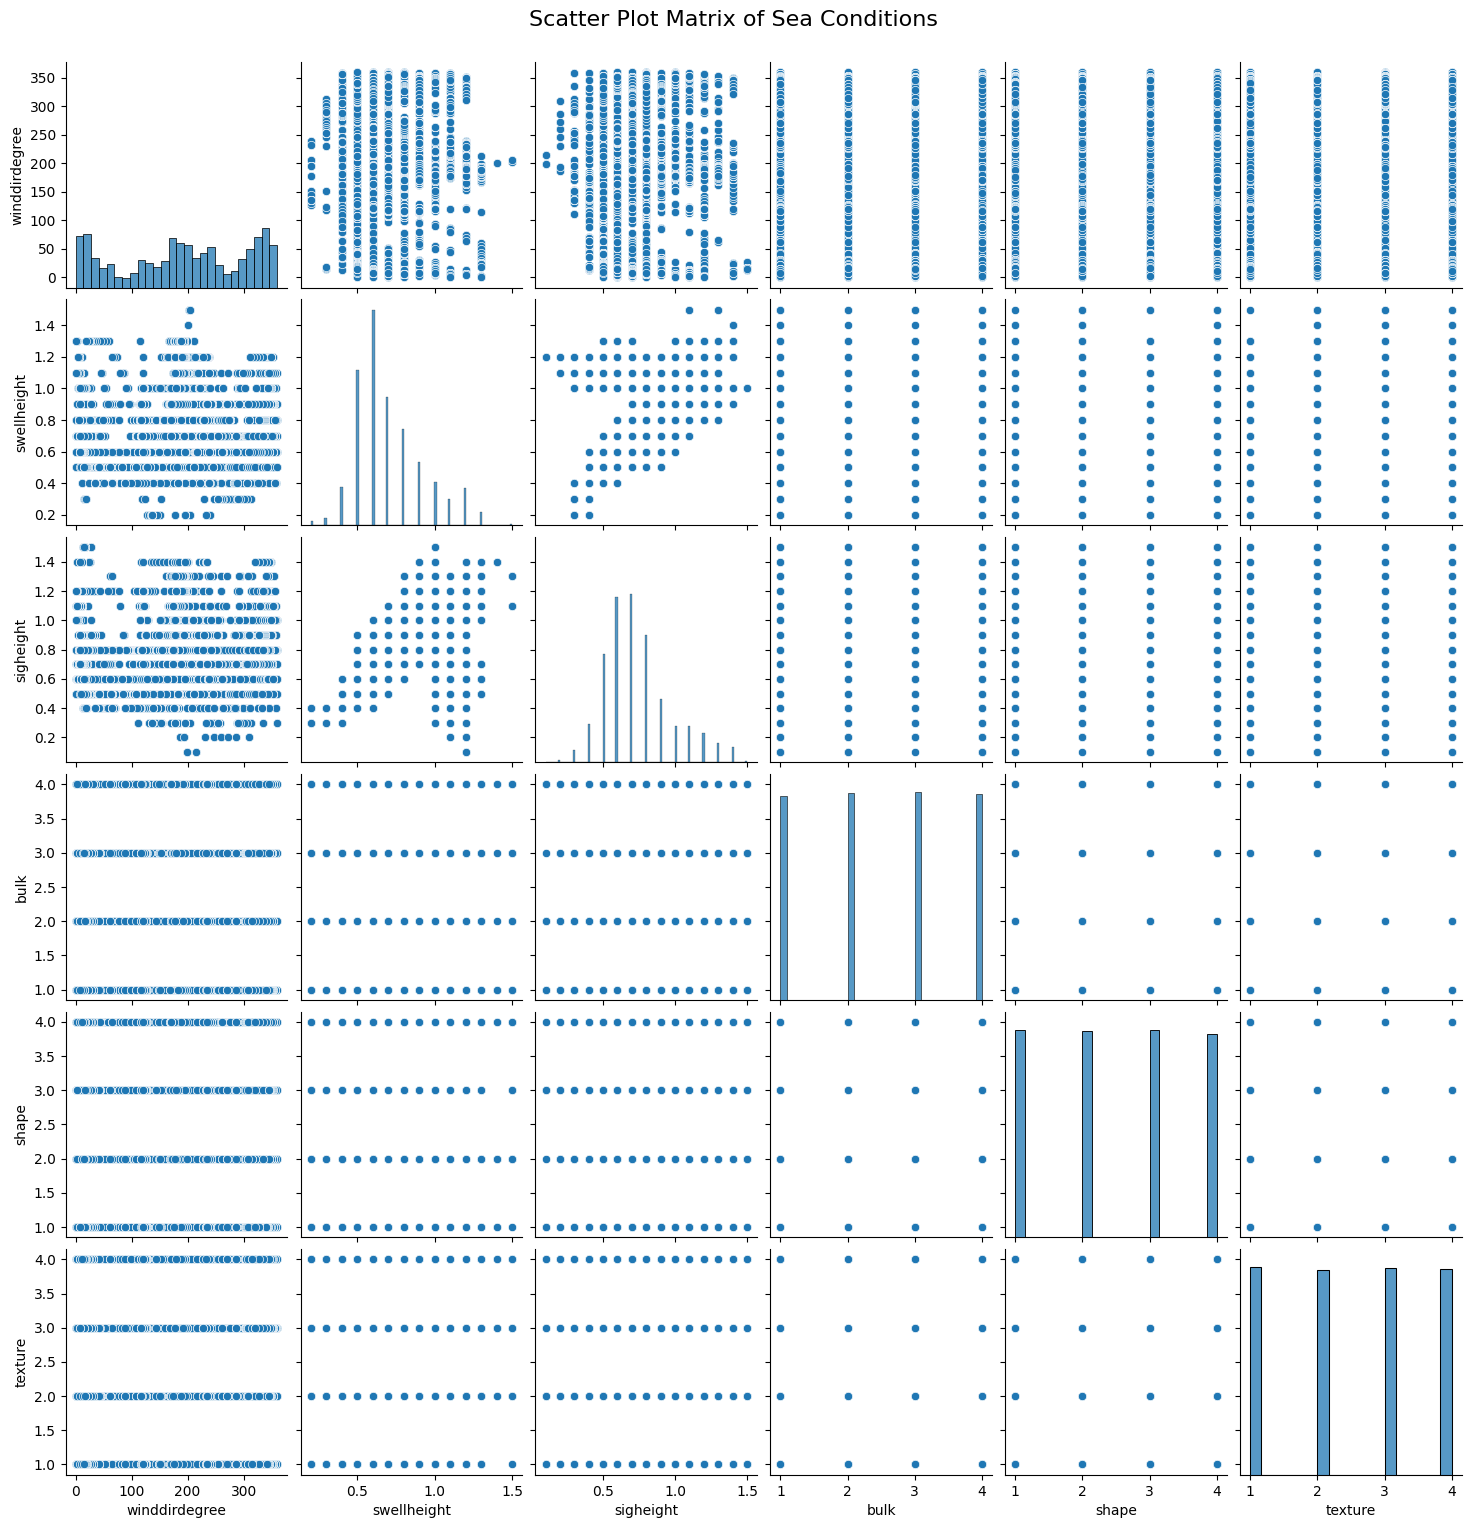

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.projections.polar import PolarAxes
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
data = pd.read_csv('../Dataset/hour_forecast.csv')

# Normalize wind directions to radians for Wind Rose
wind_directions_deg = data['winddirdegree']
wind_directions_rad = np.deg2rad(wind_directions_deg)
wind_speeds = data['windspeed']

# Generate example data for the Scatter Plot Matrix
df_conditions = data[['winddirdegree', 'swellheight', 'sigheight']].copy()
df_conditions.loc[:, 'bulk'] = np.random.randint(1, 5, size=len(df_conditions))
df_conditions.loc[:, 'shape'] = np.random.randint(1, 5, size=len(df_conditions))
df_conditions.loc[:, 'texture'] = np.random.randint(1, 5, size=len(df_conditions))

# Generate data for 3D Surface Plot
times = np.arange(len(data))  # Simulating 'time' as an index
wave_heights = data['sigheight']
wind_directions = data['winddirdegree']

# Set up the dashboard with subplots (2 rows, 1 column)
fig = plt.figure(figsize=(16, 10))

# First plot: Wind Rose (Spider Chart)
ax1 = fig.add_subplot(121, polar=True)
ax1.scatter(wind_directions_rad, wind_speeds, c=wind_speeds, cmap='coolwarm', alpha=0.75)
ax1.set_theta_zero_location("N")  # North at the top
ax1.set_theta_direction(-1)  # Clockwise
ax1.set_title('Wind Rose (Wind Direction and Speed)', fontsize=16)
ax1.set_rlabel_position(0)  # Positioning the radial labels

# Second plot: 3D Surface Plot
ax3 = fig.add_subplot(122, projection='3d')
surf = ax3.plot_trisurf(wind_directions, times, wave_heights, cmap='viridis', linewidth=0.5)
ax3.set_xlabel('Wind Direction (Degrees)')
ax3.set_ylabel('Time (Index)')
ax3.set_zlabel('Wave Height (Sigheight)')
ax3.set_title('3D Surface of Wave Heights by Wind Direction and Time')
fig.colorbar(surf, ax=ax3, shrink=0.5, aspect=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the main dashboard with Wind Rose and 3D Surface plot
plt.show()

# Separate plot for Seaborn's pairplot (it does not work well with subplots)
sns.pairplot(df_conditions)
plt.suptitle('Scatter Plot Matrix of Sea Conditions', y=1.02, fontsize=16)  # Adjust title position
plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_28916\2221177866.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot_tide.fillna(method='ffill', inplace=True)


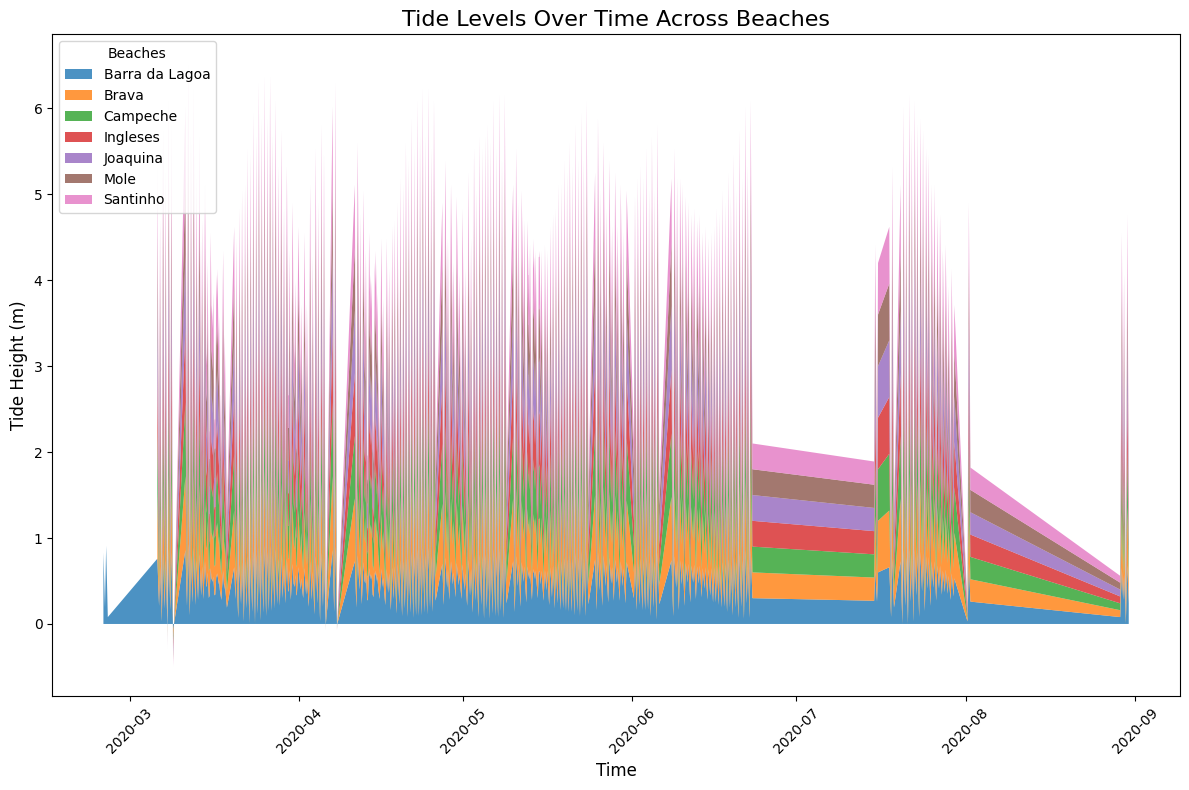

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the tide data
tide_path = '../Dataset/tide.csv'
tide_data = pd.read_csv(tide_path)

beach_path = '../Dataset/beach.csv'
beach_data = pd.read_csv(beach_path)

day_forecast_path = '../Dataset/day_forecast.csv'
day_forecast_data = pd.read_csv(day_forecast_path)

# Merge tide data with beach and day_forecast to get beach names and dates
merged_tide = pd.merge(tide_data, day_forecast_data, on='iddayforecast')
merged_tide = pd.merge(merged_tide, beach_data, on='idbeach')

# Convert the 'time' column to datetime for better plotting
merged_tide['time'] = pd.to_datetime(merged_tide['time'])

# Create a pivot table for tide height over time for each beach
pivot_tide = merged_tide.pivot_table(
    index='time', columns='name', values='height', aggfunc='mean'
)

# Fill any missing values
pivot_tide.fillna(method='ffill', inplace=True)

# Create the stacked area chart
plt.figure(figsize=(12, 8))

# Use stackplot to visualize tide levels across beaches
plt.stackplot(
    pivot_tide.index,
    [pivot_tide[col] for col in pivot_tide.columns],
    labels=pivot_tide.columns,
    alpha=0.8
)

# Add chart elements
plt.title('Tide Levels Over Time Across Beaches', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Tide Height (m)', fontsize=12)
plt.legend(loc='upper left', title='Beaches')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_17468\3595276469.py:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


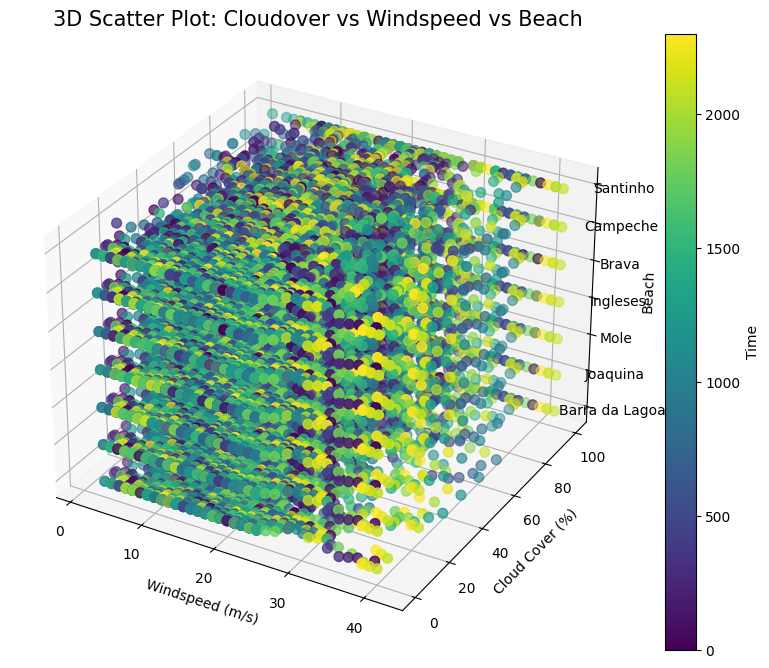

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data (replace with the actual file paths)
day_forecast_path = '../Dataset/day_forecast.csv'
hour_forecast_path = '../Dataset/hour_forecast.csv'
beach_path = '../Dataset/beach.csv'

# Load the datasets
day_forecast = pd.read_csv(day_forecast_path)
hour_forecast = pd.read_csv(hour_forecast_path)
beach = pd.read_csv(beach_path)

# Merge datasets based on common fields 'iddayforecast' and 'idbeach'
merged_data = pd.merge(hour_forecast, day_forecast[['iddayforecast', 'idbeach']], on='iddayforecast')
merged_data = pd.merge(merged_data, beach[['idbeach', 'name']], on='idbeach')

# Map beach names to numerical values for Z-axis
beach_mapping = {name: idx for idx, name in enumerate(merged_data['name'].unique())}
merged_data['beach_num'] = merged_data['name'].map(beach_mapping)

# Prepare data for the plot
X = merged_data['windspeed']  # X-axis: Windspeed
Y = merged_data['cloundover']  # Y-axis: Cloud Cover
Z = merged_data['beach_num']   # Z-axis: Beach (numerical)
colors = merged_data['time']   # Use time as color

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D with color by time
sc = ax.scatter(X, Y, Z, c=colors, cmap='viridis', s=50)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Time')

# Set axis labels
ax.set_xlabel('Windspeed (m/s)')
ax.set_ylabel('Cloud Cover (%)')
ax.set_zlabel('Beach')

# Set custom ticks for beaches
ax.set_zticks(list(beach_mapping.values()))
ax.set_zticklabels(list(beach_mapping.keys()))

# Set the plot title
plt.title('3D Scatter Plot: Cloudover vs Windspeed vs Beach', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()


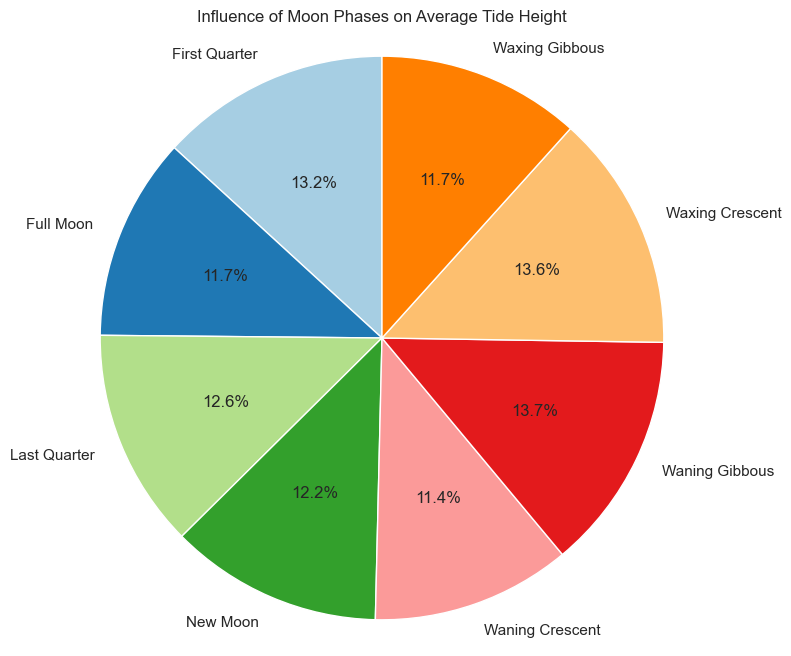

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
day_forecast_path = '../Dataset/day_forecast.csv'
tide_path = '../Dataset/tide.csv'

day_forecast = pd.read_csv(day_forecast_path)
tide = pd.read_csv(tide_path)

# Merge day_forecast and tide data on 'iddayforecast'
merged_data = pd.merge(tide, day_forecast[['iddayforecast', 'moon_phase']], on='iddayforecast')

# Group by moon phase and calculate the average tide height
moon_tide_data = merged_data.groupby('moon_phase').agg({
    'height': 'mean'
}).reset_index()

# Extract the moon phases and corresponding average tide heights
moon_phases = moon_tide_data['moon_phase'].tolist()
avg_tide_heights = moon_tide_data['height'].tolist()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(avg_tide_heights, labels=moon_phases, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Influence of Moon Phases on Average Tide Height')
plt.axis('equal')  # Ensures that pie chart is drawn as a circle

# Display the pie chart
plt.show()


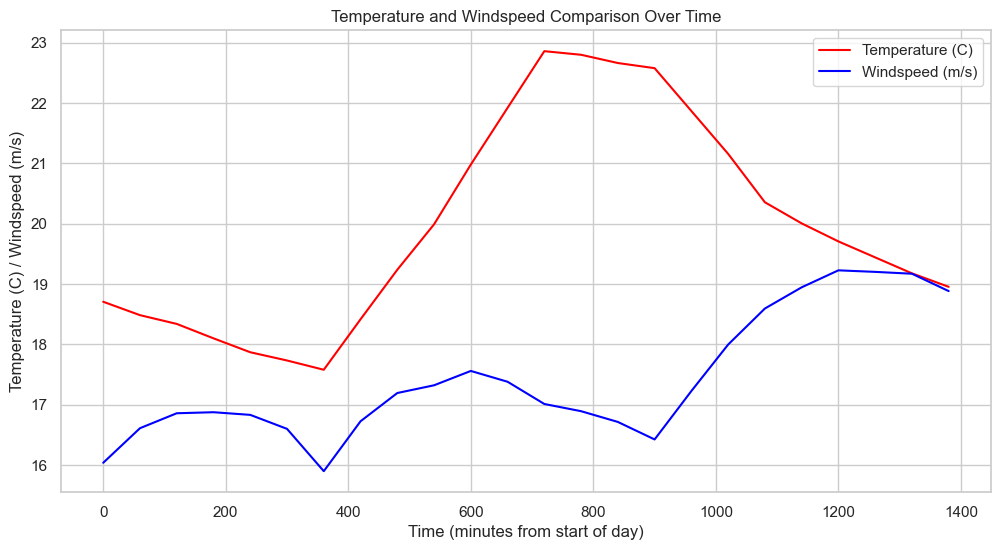

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets (assuming you've merged the necessary datasets)
hour_forecast_path = '../Dataset/hour_forecast.csv'
hour_forecast = pd.read_csv(hour_forecast_path)

# Convert the 'time' column to a numeric format (e.g., HHMM to minutes)
hour_forecast['time_numeric'] = (hour_forecast['time'] // 100 * 60) + (hour_forecast['time'] % 100)

# Group the data by time for each beach
grouped_data = hour_forecast.groupby('time_numeric').agg({
    'temperature': 'mean',
    'windspeed': 'mean'
}).reset_index()

# Plotting the temperature and windspeed over time
plt.figure(figsize=(12, 6))

# Plot temperature trend
sns.lineplot(x=grouped_data['time_numeric'], y=grouped_data['temperature'], label='Temperature (C)', color='red')

# Plot windspeed trend
sns.lineplot(x=grouped_data['time_numeric'], y=grouped_data['windspeed'], label='Windspeed (m/s)', color='blue')

# Adding title and labels
plt.title('Temperature and Windspeed Comparison Over Time')
plt.xlabel('Time (minutes from start of day)')
plt.ylabel('Temperature (C) / Windspeed (m/s)')
plt.legend()

plt.show()


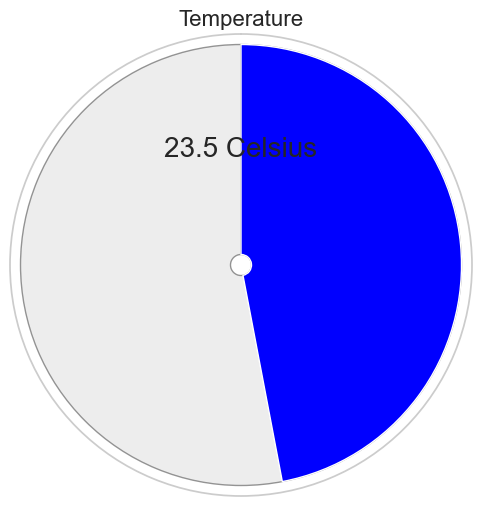

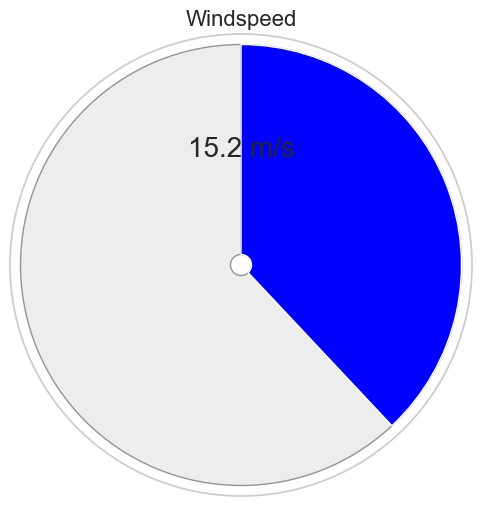

In [9]:
import numpy as np

# Function to create a gauge-like plot
def create_gauge_chart(value, max_value, title, unit):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
    ax.set_theta_offset(np.pi / 2)  # Start from the top
    ax.set_theta_direction(-1)      # Clockwise
    
    # Create gauge background
    ax.barh(0, 2 * np.pi, color="lightgray", height=1, edgecolor="black", alpha=0.4)
    
    # Plot the current value
    ax.barh(0, value / max_value * 2 * np.pi, color="blue", height=1)
    
    # Set labels and title
    ax.set_yticks([])  # Hide the radius scale
    ax.set_xticks([])  # Hide the angle scale
    ax.text(0, 0, f"{value:.1f} {unit}", ha='center', va='center', fontsize=20)
    plt.title(title, fontsize=16)

    plt.show()

# Example real-time values (you can replace these with actual real-time data from beaches)
temperature_value = 23.5  # Current temperature at the beach
windspeed_value = 15.2    # Current windspeed at the beach

# Create the gauge charts
create_gauge_chart(temperature_value, 50, "Temperature", "Celsius")  # Max temperature set to 50 degrees Celsius
create_gauge_chart(windspeed_value, 40, "Windspeed", "m/s")          # Max windspeed set to 40 m/s


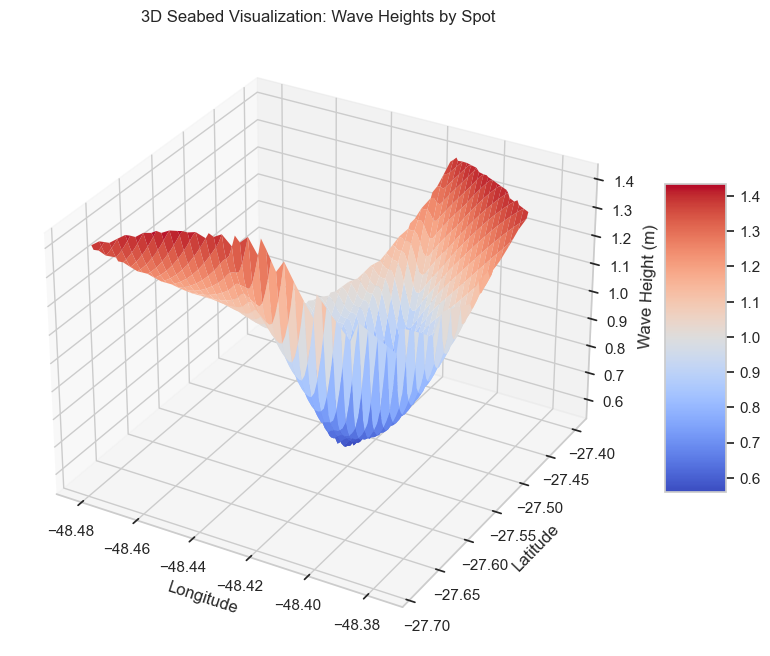

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

beach_path = '../Dataset/beach.csv'
hour_forecast_path = '../Dataset/hour_forecast.csv'
spot_path = '../Dataset/spot.csv'
day_forecast_path = '../Dataset/day_forecast.csv'

beach = pd.read_csv(beach_path)
hour_forecast = pd.read_csv(hour_forecast_path)
spot = pd.read_csv(spot_path)
day_forecast = pd.read_csv(day_forecast_path)

merged_data = pd.merge(spot, beach[['idbeach', 'latitude', 'longitude']], on='idbeach')

forecast_data = pd.merge(hour_forecast, day_forecast[['iddayforecast', 'idbeach']], on='iddayforecast')

final_data = pd.merge(merged_data, forecast_data[['iddayforecast', 'sigheight', 'idbeach']], on='idbeach')

x = final_data['longitude']
y = final_data['latitude']
z = final_data['sigheight']

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

from scipy.interpolate import griddata

zi = griddata((x, y), z, (xi, yi), method='cubic')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xi, yi, zi, cmap='coolwarm', edgecolor='none')

ax.set_title('3D Seabed Visualization: Wave Heights by Spot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Wave Height (m)')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


In [1]:
import pandas as pd
import lightningchart as lc
import numpy as np
from scipy.interpolate import interp2d

with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

beach_path = '../Dataset/beach.csv'
hour_forecast_path = '../Dataset/hour_forecast.csv'
spot_path = '../Dataset/spot.csv'
day_forecast_path = '../Dataset/day_forecast.csv'

beach = pd.read_csv(beach_path)
hour_forecast = pd.read_csv(hour_forecast_path)
spot = pd.read_csv(spot_path)
day_forecast = pd.read_csv(day_forecast_path)

merged_data = pd.merge(spot, beach[['idbeach', 'latitude', 'longitude']], on='idbeach')

forecast_data = pd.merge(hour_forecast, day_forecast[['iddayforecast', 'idbeach']], on='iddayforecast')

final_data = pd.merge(merged_data, forecast_data[['iddayforecast', 'sigheight', 'idbeach']], on='idbeach')

x = final_data['longitude'].values
y = final_data['latitude'].values
z = final_data['sigheight'].values

interpolator = interp2d(x, y, z, kind='cubic')

grid_lon = np.linspace(x.min(), x.max(), 100)
grid_lat = np.linspace(y.min(), y.max(), 100)

grid_wave_height = interpolator(grid_lon, grid_lat)

chart = lc.Chart3D(
    theme=lc.Themes.Dark,
    title='3D Seabed Visualization: Wave Heights by Spot'
)

surface_series = chart.add_surface_grid_series(
    columns=len(grid_lon),
    rows=len(grid_lat)
)

surface_series.set_start(x=grid_lon.min(), z=grid_lat.min())
surface_series.set_end(x=grid_lon.max(), z=grid_lat.max())

surface_series.set_step(
    x=(grid_lon.max() - grid_lon.min()) / len(grid_lon),
    z=(grid_lat.max() - grid_lat.min()) / len(grid_lat)
)

surface_series.invalidate_height_map(grid_wave_height.tolist())

surface_series.set_palette_colors(
    steps=[
        {"value": np.nanmin(grid_wave_height), "color": lc.Color(0, 0, 255)},       # Blue 
        {"value": np.nanpercentile(grid_wave_height, 25), "color": lc.Color(0, 255, 255)},  # Cyan 
        {"value": np.nanmedian(grid_wave_height), "color": lc.Color(0, 255, 0)},    # Green 
        {"value": np.nanpercentile(grid_wave_height, 75), "color": lc.Color(255, 255, 0)},  # Yellow
        {"value": np.nanmax(grid_wave_height), "color": lc.Color(255, 0, 0)}        # Red s
    ],
    look_up_property='value',
    percentage_values=False
)

surface_series.invalidate_intensity_values(grid_wave_height.tolist())

surface_series.hide_wireframe()

chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Wave Height (m)')
chart.get_default_z_axis().set_title('Latitude')

chart.add_legend(data=surface_series)

# Open the chart
chart.open()


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13340\4082964440.py:30: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolator = interp2d(x, y, z, kind='cubic')
c:\Users\Soroush\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=3,3 nx,ny=18,19 m=28128 fp=1574.095055 s=0.00

127.0.0.1 - - [19/Sep/2024 11:04:51] "GET / HTTP/1.1" 200 -


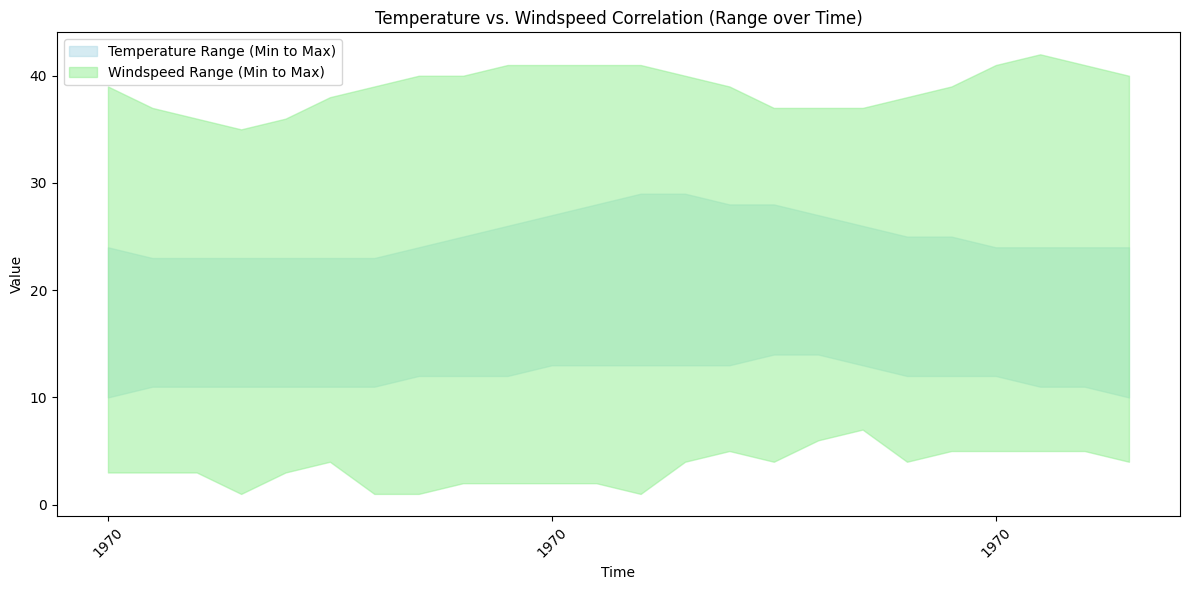

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
beach_path = '../Dataset/beach.csv'
hour_forecast_path = '../Dataset/hour_forecast.csv'
spot_path = '../Dataset/spot.csv'
day_forecast_path = '../Dataset/day_forecast.csv'

beach = pd.read_csv(beach_path)
hour_forecast = pd.read_csv(hour_forecast_path)
spot = pd.read_csv(spot_path)
day_forecast = pd.read_csv(day_forecast_path)

# Merge the relevant datasets
merged_data = pd.merge(spot, beach[['idbeach', 'name']], on='idbeach')
forecast_data = pd.merge(hour_forecast, day_forecast[['iddayforecast', 'idbeach']], on='iddayforecast')
final_data = pd.merge(merged_data, forecast_data[['iddayforecast', 'time', 'temperature', 'windspeed', 'idbeach']], on='idbeach')

# Group by time to calculate min and max values for temperature and windspeed
temp_wind_data = final_data.groupby('time').agg({
    'temperature': ['min', 'max'],
    'windspeed': ['min', 'max']
}).reset_index()

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))

# Time axis
time_values = pd.to_datetime(temp_wind_data['time'])

# Temperature range (min to max)
ax.fill_between(time_values, temp_wind_data['temperature', 'min'], temp_wind_data['temperature', 'max'], 
                color='lightblue', alpha=0.5, label='Temperature Range (Min to Max)')

# Windspeed range (min to max)
ax.fill_between(time_values, temp_wind_data['windspeed', 'min'], temp_wind_data['windspeed', 'max'], 
                color='lightgreen', alpha=0.5, label='Windspeed Range (Min to Max)')

# Add titles and labels
ax.set_title('Temperature vs. Windspeed Correlation (Range over Time)')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Add legend
ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


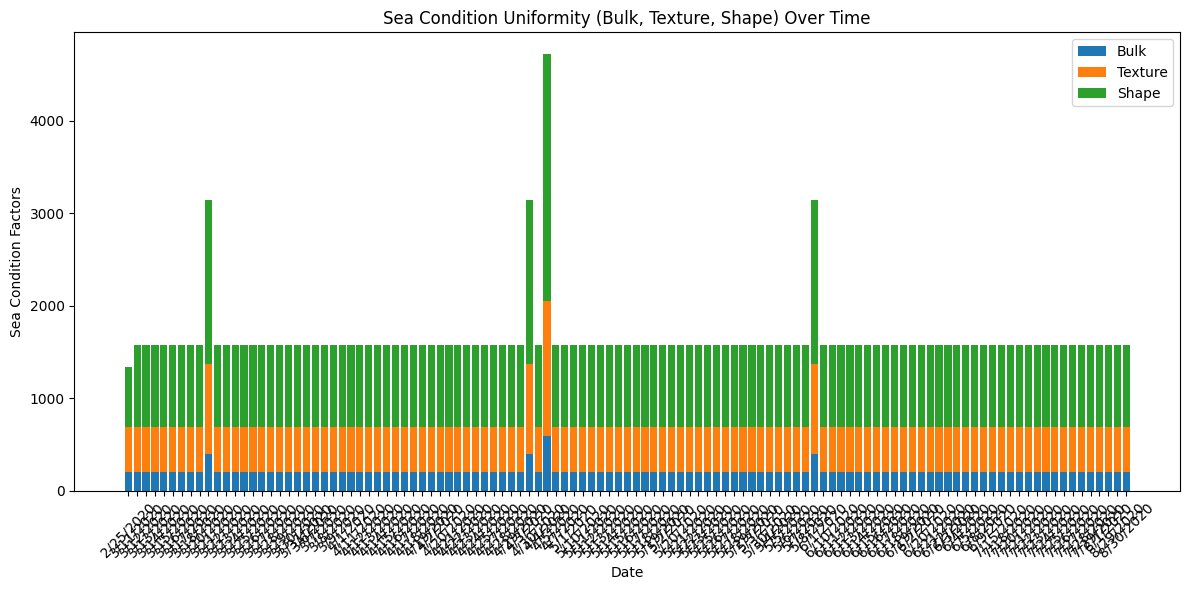

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
beach_path = '../Dataset/beach.csv'
sea_condition_path = '../Dataset/sea_condition_fact.csv'
day_forecast_path = '../Dataset/day_forecast.csv'
spot_path = '../Dataset/spot.csv'

# Load the CSV files into DataFrames
beach = pd.read_csv(beach_path)
sea_condition = pd.read_csv(sea_condition_path)
day_forecast = pd.read_csv(day_forecast_path)
spot = pd.read_csv(spot_path)

# Merge the datasets to link sea condition factors with the beach and time
# First, merge sea_condition with spot to get the 'idbeach'
merged_data = pd.merge(sea_condition, spot[['idspot', 'idbeach']], on='idspot')

# Then merge with the beach to get beach name
merged_data = pd.merge(merged_data, beach[['idbeach', 'name']], on='idbeach')

# Finally, merge with the day_forecast to get the date
merged_data = pd.merge(merged_data, day_forecast[['iddayforecast', 'date', 'idbeach']], on='idbeach')

# Use 'date_y' from the merged data as the correct date column
merged_data['date'] = merged_data['date_y']

# Group the data by date and beach, and calculate sum of sea conditions (bulk, texture, shape) for each group
grouped_data = merged_data.groupby(['date', 'name']).agg({
    'bulk': 'sum',
    'texture': 'sum',
    'shape': 'sum'
}).reset_index()

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for each factor (bulk, texture, shape)
ax.bar(grouped_data['date'], grouped_data['bulk'], label='Bulk')
ax.bar(grouped_data['date'], grouped_data['texture'], bottom=grouped_data['bulk'], label='Texture')
ax.bar(grouped_data['date'], grouped_data['shape'], bottom=grouped_data['bulk'] + grouped_data['texture'], label='Shape')

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sea Condition Factors')
ax.set_title('Sea Condition Uniformity (Bulk, Texture, Shape) Over Time')

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
import lightningchart as lc
import pandas as pd

# Set up the license
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()

lc.set_license(mylicensekey)

# Load the datasets
beach_path = '../Dataset/beach.csv'
sea_condition_path = '../Dataset/sea_condition_fact.csv'  # Corrected file
day_forecast_path = '../Dataset/day_forecast.csv'
spot_path = '../Dataset/spot.csv'

# Load the CSV files into DataFrames
beach = pd.read_csv(beach_path)
sea_condition = pd.read_csv(sea_condition_path)
day_forecast = pd.read_csv(day_forecast_path)
spot = pd.read_csv(spot_path)

# Merge the datasets to link sea condition factors with the beach and time
# First, merge sea_condition with spot to get the 'idbeach'
merged_data = pd.merge(sea_condition, spot[['idspot', 'idbeach']], on='idspot')

# Then merge with the beach to get beach name
merged_data = pd.merge(merged_data, beach[['idbeach', 'name']], on='idbeach')

# Finally, merge with the day_forecast to get the date
merged_data = pd.merge(merged_data, day_forecast[['iddayforecast', 'date', 'idbeach']], on='idbeach')

# Use 'date_y' from the merged data as the correct date column
merged_data['date'] = merged_data['date_y']

# Group the data by date and beach, and calculate sum of sea conditions (bulk, texture, shape) for each group
grouped_data = merged_data.groupby(['date', 'name']).agg({
    'bulk': 'sum',
    'texture': 'sum',
    'shape': 'sum'
}).reset_index()

# Prepare data for the stacked bar chart
dates = grouped_data['date'].unique().tolist()  # Dates for X-axis
beaches = grouped_data['name'].unique().tolist()  # Beach names for the legend

# Prepare sub-categories (bulk, texture, shape) as subCategory for each beach
stacked_data = []
for beach in beaches:
    beach_data = grouped_data[grouped_data['name'] == beach]
    stacked_data.append({
        'subCategory': f'Bulk ({beach})',
        'values': beach_data['bulk'].tolist()
    })
    stacked_data.append({
        'subCategory': f'Texture ({beach})',
        'values': beach_data['texture'].tolist()
    })
    stacked_data.append({
        'subCategory': f'Shape ({beach})',
        'values': beach_data['shape'].tolist()
    })

# Create the Stacked Bar Chart in LightningChart
chart = lc.BarChart(
    vertical=True,
    theme=lc.Themes.White,
    title='Sea Condition Uniformity (Bulk, Texture, Shape) Over Time'
)

# Set the data with categories (dates) and sub-categories (bulk, texture, shape for each beach)
chart.set_data_stacked(
    dates,  # X-axis labels (dates)
    stacked_data  # Sub-category values for each beach and factor
)

# Set label display mode for value labels
chart.set_value_label_display_mode('hidden')

# Add a legend for the stacked bar chart
chart.add_legend().add(chart)

# Open the chart
chart.open()



127.0.0.1 - - [19/Sep/2024 14:31:26] "GET / HTTP/1.1" 200 -


In [6]:
import pandas as pd
import numpy as np
import lightningchart as lc
from scipy.interpolate import griddata

# Load the license key
with open('D:/Computer Aplication/WorkPlacement/Projects/shared_variable.txt', 'r') as f:
    mylicensekey = f.read().strip()
lc.set_license(mylicensekey)

# Load the datasets
beach_path = '../Dataset/beach.csv'
hour_forecast_path = '../Dataset/hour_forecast.csv'
spot_path = '../Dataset/spot.csv'
day_forecast_path = '../Dataset/day_forecast.csv'

beach = pd.read_csv(beach_path)
hour_forecast = pd.read_csv(hour_forecast_path)
spot = pd.read_csv(spot_path)
day_forecast = pd.read_csv(day_forecast_path)

# Merge the relevant datasets
merged_data = pd.merge(spot, beach[['idbeach', 'latitude', 'longitude']], on='idbeach')
forecast_data = pd.merge(hour_forecast, day_forecast[['iddayforecast', 'idbeach']], on='iddayforecast')
final_data = pd.merge(merged_data, forecast_data[['iddayforecast', 'sigheight', 'idbeach']], on='idbeach')

# Prepare X (Longitude), Y (Latitude), and Z (Wave Height) data
x = final_data['longitude'].values
y = final_data['latitude'].values
z = final_data['sigheight'].values

# Create the grid for heatmap (using np.linspace to create evenly spaced grid)
grid_lon = np.linspace(x.min(), x.max(), 100)
grid_lat = np.linspace(y.min(), y.max(), 100)

# Create 2D grid for longitude and latitude using meshgrid
grid_lon, grid_lat = np.meshgrid(grid_lon, grid_lat)

# Create a 2D array for wave height (using interpolation to fill the grid)
grid_wave_height = griddata((x, y), z, (grid_lon, grid_lat), method='cubic')

# Handle NaN values (can replace NaN with the average wave height, or set it to 0)
grid_wave_height[np.isnan(grid_wave_height)] = np.nanmean(z)

# Create the heatmap chart using LightningChart
chart = lc.ChartXY(
    title='Heatmap of Wave Height by Longitude and Latitude',
    theme=lc.Themes.Light
)

# Add a heatmap grid series
heatmap = chart.add_heatmap_grid_series(
    rows=grid_lat.shape[0],
    columns=grid_lon.shape[1]
)

# Set heatmap start, end, and step positions
heatmap.set_start(x=grid_lon.min(), y=grid_lat.min())
heatmap.set_end(x=grid_lon.max(), y=grid_lat.max())
heatmap.set_step(x=(grid_lon.max() - grid_lon.min()) / grid_lon.shape[1], y=(grid_lat.max() - grid_lat.min()) / grid_lat.shape[0])

# Set the intensity values to the heatmap
heatmap.invalidate_intensity_values(grid_wave_height.tolist())
heatmap.hide_wireframe()
# Set axis titles
chart.get_default_x_axis().set_title('Longitude')
chart.get_default_y_axis().set_title('Latitude')

# Set the color palette for the heatmap (blue to red representing low to high wave heights)
custom_palette = [
    {"value": np.nanmin(grid_wave_height), "color": lc.Color(0, 0, 255)},  # Blue
    {"value": np.nanpercentile(grid_wave_height, 25), "color": lc.Color(0, 255, 255)},  # Cyan
    {"value": np.nanmedian(grid_wave_height), "color": lc.Color(0, 255, 0)},  # Green
    {"value": np.nanpercentile(grid_wave_height, 75), "color": lc.Color(255, 255, 0)},  # Yellow
    {"value": np.nanmax(grid_wave_height), "color": lc.Color(255, 0, 0)}  # Red
]

heatmap.set_palette_colors(
    steps=custom_palette,
    look_up_property='value',
    interpolate=True
)

# Open the chart
chart.open()


127.0.0.1 - - [20/Sep/2024 11:02:21] "GET / HTTP/1.1" 200 -
